In [13]:
import pandas as pd
import plotly.express as px
import plotly
from plotly.graph_objs import Scattermapbox
import  plotly.graph_objs as go


ModuleNotFoundError: No module named 'dash'

In [15]:
centers_info_dataset = pd.read_csv('centers_info_dataset.csv')

labeled_data = pd.read_csv('labeled_data_full_dataset.csv')

In [18]:
# let's create a function to filter data by day and hour given a month
# We also add a remove_outliers function that will be usefull later. 

def select_date_time(df, month, day, hour, remove_outliers = False):
       
    if remove_outliers:
        mask = (df['month'] == month) & (df['day_name'] == day) & (df['hour'] == hour) \
                                      & (df['labels'] != -1)
    else:
        mask = (df['month'] == month) & (df['day_name'] == day) & (df['hour'] == hour)
       
    
    return df[mask]

In [19]:
#let's create a function to select data and plot it on a map

def select_data_and_plot(df,month, day, hour):
    
#Preprocessing 

    #We filter on the desired month, day, and hour and we remove outliers
    data = select_date_time(df, month, day, hour, remove_outliers = True)
    #We get centers coordinates of each cluster
    cluster_centers = centers_info_dataset.loc[(centers_info_dataset['month'] == month) &
                                                (centers_info_dataset['day_name'] == day) &
                                                (centers_info_dataset['hour'] == hour)
                                               ,:]


    #Plotly
    mapbox_access_token = 'pk.eyJ1IjoiYW5pc3pha2FyaSIsImEiOiJja2k4MG4xZW0wMTZwMnFwanVvdG5sMWpqIn0.MGKzhSzS6zaZRQM14fAPcQ'
    fig = go.Figure()

    #creating outlines for markers

    fig.add_trace(go.Scattermapbox(
            lat = data['Lat'],
            lon = data['Lon'],
            name = 'Position of potential clients (whole month)',
            mode = 'markers',
            marker = dict(
                size = 7,
                color = 'blue',
                opacity = 0.7
            )
        )) 

    #dots for a given month
    fig.add_trace(go.Scattermapbox(
            lat = data['Lat'],
            lon = data['Lon'],
            mode = 'markers',
            showlegend = False,
            marker = dict(
                size = 6,
                color = data['labels'],
                colorscale = 'Blugrn',
                opacity = 0.6
            )
        )) 


    #Red bubles with average number of people
    fig.add_trace(go.Scattermapbox(
            lat = cluster_centers['Lat'],
            lon = cluster_centers['Lon'],
            mode = 'markers+text',
            name = 'Average number of potential clients for the selected hour (for a selected day of the week, on a given month)',
            textposition = 'middle center',
            text = [str(n) for n in cluster_centers['number_of_people/day_average']], #It displays average number of people for a given hour, a given day, in a given month
            textfont = dict( color = 'white', family = 'Calibri', size = 14),
            marker = dict(
                size = np.log(cluster_centers['number_of_people/day_average'])*20, #we use log so that the difference in size is not extreme between 2 Bubbles
    #            color ='rgb(51, 53, 255)',
                color = 'rgb(255, 0, 0)',
    #           color = 'rgb(102, 204, 0)',
                opacity=0.6,
            ),
            hoverinfo='none'
            
        ))


    fig.update_layout(
            title = dict(text = 'Hot Zones based on uber data', x = 0.5),
            font = dict(family='Tw Cen MT, monospace', size=24, color='rgb(0,0,0)'),
            autosize = True,
            hovermode = 'closest',
            showlegend=True,
            width=1000,
            height=700,
            legend=dict(yanchor="top", y=0.00005,xanchor="center",x=0.5,
                        borderwidth = 1,
                        font = dict (family="Courier", size=12, color="black")
                       ),

            mapbox=dict(
                accesstoken = mapbox_access_token,
                center = dict(lat = cluster_centers['Lat'].mean() , lon = cluster_centers['Lon'].mean()),
                bearing = 0,
                pitch = 0,
                zoom = 9.8,
    #            style = 'outdoors'
    #            style = 'dark'
    #            style = 'light'
                style = 'streets'
            ),
        )                    


    fig.show()

In [34]:
select_date_time(labeled_data, 4, 'Monday', 2)

,Unnamed: 0,Date/Time,Lat,Lon,Base,month,day_name,hour,day,labels
504434,7790,2014-04-07 02:07:00,40.7458,-73.8273,B02512,4,Monday,2,7,-1
504435,7791,2014-04-07 02:36:00,40.7415,-74.0086,B02512,4,Monday,2,7,-1
504436,7792,2014-04-07 02:42:00,40.7278,-73.9851,B02512,4,Monday,2,7,-1
504437,15866,2014-04-14 02:44:00,40.7632,-73.9719,B02512,4,Monday,2,14,-1
504438,15867,2014-04-14 02:53:00,40.7215,-73.9884,B02512,4,Monday,2,14,-1
...,...,...,...,...,...,...,...,...,...,...
504667,558910,2014-04-14 02:14:00,40.7604,-73.9623,B02764,4,Monday,2,14,-1
504668,560984,2014-04-21 02:02:00,40.6961,-73.9712,B02764,4,Monday,2,21,-1
504669,560985,2014-04-21 02:57:00,40.7321,-73.9902,B02764,4,Monday,2,21,-1
504670,563280,2014-04-28 02:01:00,40.7602,-73.9622,B02764,4,Monday,2,28,-1


In [36]:
a = 'lol'
'lollol ' + a

'lollol lol'

In [33]:
centers_info_dataset.loc[(centers_info_dataset['month']==5)&
                         (centers_info_dataset['day_name']=='Monday'),:]

,labels,Lat,Lon,number_of_people/month,number_of_people/day_average,month,day_name,hour
672,0,40.735397,-73.995115,320,80,5.0,Monday,0.0
673,1,40.706643,-74.011671,28,7,5.0,Monday,0.0
674,0,40.739006,-74.004396,49,12,5.0,Monday,1.0
675,1,40.722394,-73.990210,48,12,5.0,Monday,1.0
676,0,40.740198,-74.005298,41,10,5.0,Monday,2.0
...,...,...,...,...,...,...,...,...
765,3,40.691460,-74.179551,65,16,5.0,Monday,22.0
766,4,40.772574,-73.869726,55,13,5.0,Monday,22.0
767,0,40.742052,-73.991501,834,208,5.0,Monday,23.0
768,1,40.645270,-73.784451,148,37,5.0,Monday,23.0


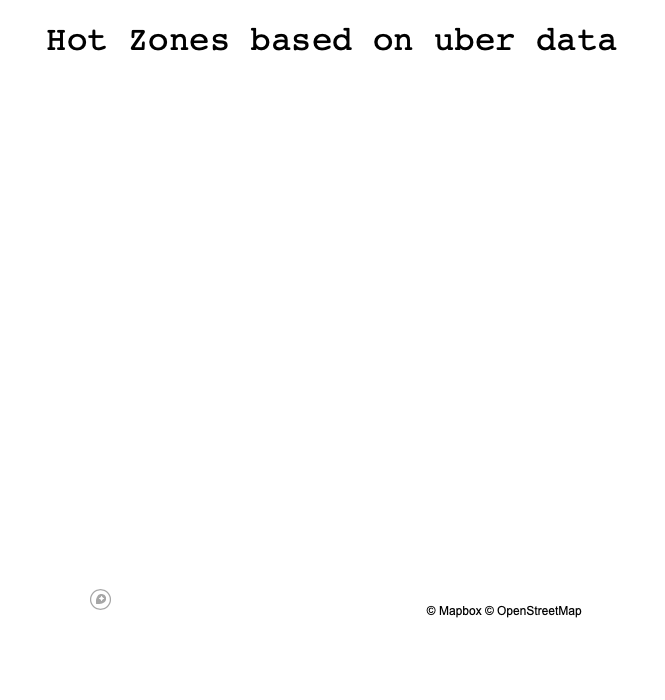

In [21]:
select_data_and_plot(labeled_data, 4, 'Monday', 2)

In [40]:
encoder = pd.DataFrame(['April', 'May', 'June', 'July', 'August', 'September'], index = [4, 5, 6, 7, 8, 9])

In [57]:
str(encoder.loc[4][0])

'April'

In [2]:
import pandas as pd
labeled_data = pd.read_csv('labeled_data_full_dataset.csv')

In [10]:
labeled_data_light = labeled_data.copy()

In [11]:
labeled_data.columns

Index(['Unnamed: 0', 'Date/Time', 'Lat', 'Lon', 'Base', 'month', 'day_name',
       'hour', 'day', 'labels'],
      dtype='object')

In [19]:
#labeled_data_light = labeled_data_light.drop('Unnamed: 0', axis = 1)
labeled_data_light = labeled_data_light.drop('Date/Time', axis = 1)
labeled_data_light = labeled_data_light.drop('Base', axis = 1)

In [24]:
labeled_data_light.to_csv('labeled_data_light.csv')

In [23]:
labeled_data_light

,Lat,Lon,month,day_name,hour,day,labels
0,40.7690,-73.9549,4,Tuesday,0,1,-1
1,40.7267,-74.0345,4,Tuesday,0,1,-1
2,40.7316,-73.9873,4,Tuesday,0,1,0
3,40.7588,-73.9776,4,Tuesday,0,1,0
4,40.7594,-73.9722,4,Tuesday,0,1,0
...,...,...,...,...,...,...,...
4534322,40.6447,-73.7821,9,Sunday,23,28,1
4534323,40.7513,-73.9941,9,Sunday,23,28,0
4534324,40.6875,-74.1824,9,Sunday,23,28,2
4534325,40.6482,-73.7823,9,Sunday,23,28,1
